In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier ,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [15]:
data=pd.read_csv('/content/drive/MyDrive/ecg.csv')
data

,-0.11252183,-2.8272038,-3.7738969,-4.3497511,-4.376041,-3.4749863,-2.1814082,-1.8182865,-1.2505219,-0.47749208,...,0.79216787,0.93354122,0.79695779,0.57862066,0.2577399,0.22807718,0.12343082,0.92528624,0.19313742,1.0
0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
1,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
2,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
3,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0
4,-1.507674,-3.574550,-4.478011,-4.408275,-3.321242,-2.105171,-1.481048,-1.301362,-0.498240,-0.286928,...,1.089068,0.983369,1.014124,0.952629,0.749326,1.007076,1.634990,1.493365,-0.783134,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,-1.461841,...,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651,0.0
4993,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,-0.976047,...,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612,0.0
4994,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334,0.0
4995,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932,0.0


In [16]:
data.columns

Index(['-0.11252183', '-2.8272038', '-3.7738969', '-4.3497511', '-4.376041',
       '-3.4749863', '-2.1814082', '-1.8182865', '-1.2505219', '-0.47749208',
       ...
       '0.79216787', '0.93354122', '0.79695779', '0.57862066', '0.2577399',
       '0.22807718', '0.12343082', '0.92528624', '0.19313742', '1.0'],
      dtype='object', length=141)

In [17]:
c=[]
for i in range(1,142):
  if i<141:
    c.append('ecg '+str(i))
  else:
    c.append('target')


In [18]:
data.columns=c

In [19]:
data.columns

Index(['ecg 1', 'ecg 2', 'ecg 3', 'ecg 4', 'ecg 5', 'ecg 6', 'ecg 7', 'ecg 8',
       'ecg 9', 'ecg 10',
       ...
       'ecg 132', 'ecg 133', 'ecg 134', 'ecg 135', 'ecg 136', 'ecg 137',
       'ecg 138', 'ecg 139', 'ecg 140', 'target'],
      dtype='object', length=141)

In [22]:
x=data.drop('target',axis=1)
y=data['target'].values
x=scale(x)

In [24]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=42)

In [26]:
models={
    'LogisticRegression':LogisticRegression(),
    'KNeighborsClassifier':KNeighborsClassifier(n_neighbors=4),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'SVC(kernel=linear)':SVC(kernel='linear'),
    'SVC(kernel=poly)':SVC(kernel='poly'),
    'SVC(kernel=rbf)':SVC(kernel='rbf'),
    'GaussianNB':GaussianNB(),
    'RandomForestClassifier':RandomForestClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'MLPClassifier':MLPClassifier()
}

In [30]:
models.items()

dict_items([('LogisticRegression', LogisticRegression()), ('KNeighborsClassifier', KNeighborsClassifier(n_neighbors=4)), ('DecisionTreeClassifier', DecisionTreeClassifier()), ('SVC(kernel=linear)', SVC(kernel='linear')), ('SVC(kernel=poly)', SVC(kernel='poly')), ('SVC(kernel=rbf)', SVC()), ('GaussianNB', GaussianNB()), ('RandomForestClassifier', RandomForestClassifier()), ('AdaBoostClassifier', AdaBoostClassifier()), ('GradientBoostingClassifier', GradientBoostingClassifier()), ('MLPClassifier', MLPClassifier())])

In [42]:
def fit_and_score(models,x_train,x_test,y_train,y_test):
  model_score={}

  for name,model in models.items():
    model.fit(x_train,y_train)
    model_score[name]=model.score(x_test,y_test)*100

  model_scores=pd.DataFrame(model_score,index=['Score']).transpose()
  model_scores=model_scores.sort_values('Score')

  return model_scores


In [43]:
model_basline=fit_and_score(models,x_train,x_test,y_train,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [44]:
model_basline

,Score
GaussianNB,95.8
DecisionTreeClassifier,97.7
LogisticRegression,98.2
SVC(kernel=linear),98.2
KNeighborsClassifier,98.3
SVC(kernel=poly),98.4
RandomForestClassifier,98.8
AdaBoostClassifier,98.8
GradientBoostingClassifier,98.8
SVC(kernel=rbf),98.9


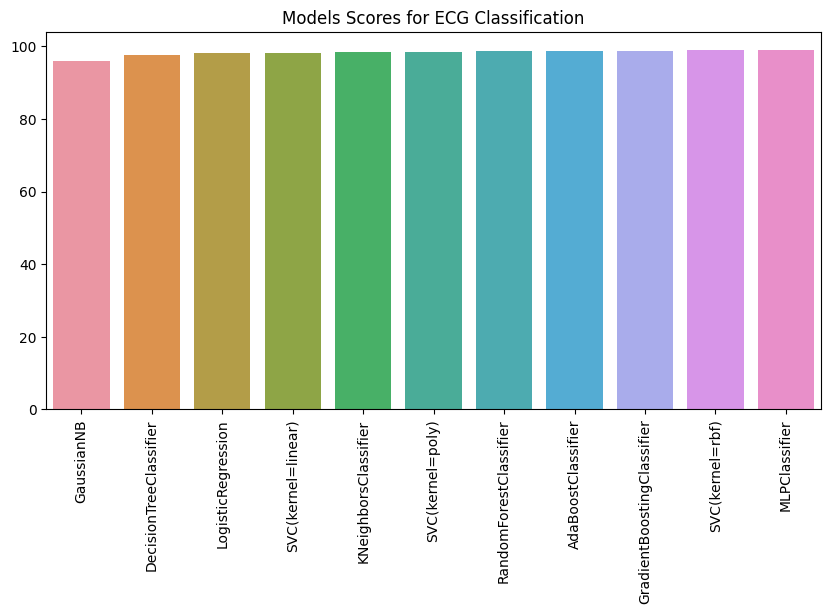

In [47]:
import seaborn as sns
plt.figure(figsize=(10,5),dpi=100)
sns.barplot(data=model_basline.T)
plt.xticks(rotation=90)
plt.title('Models Scores for ECG Classification')
plt.show()


Clustering

In [91]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
iris=load_iris()
km=KMeans(n_clusters=3)
km.fit(iris.data)
yc=km.predict(iris.data)
yc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

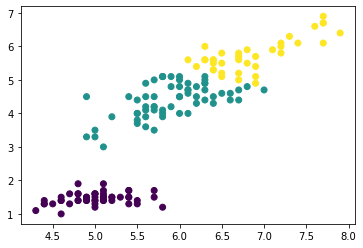

In [92]:
xs=iris.data[:,0]
ys=iris.data[:,2]
plt.scatter(xs,ys,c=yc)
plt.show()

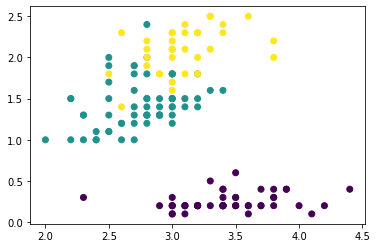

In [93]:
xs=iris.data[:,1]
ys=iris.data[:,3]
plt.scatter(xs,ys,c=yc)
plt.show()

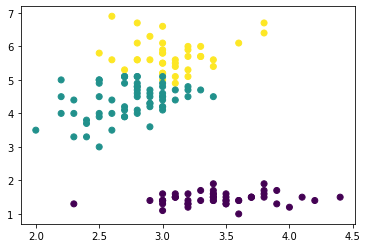

In [94]:
xs=iris.data[:,1]
ys=iris.data[:,2]
plt.scatter(xs,ys,c=yc)
plt.show()

In [95]:
i=[]
for k in range(1,9):
  iris=load_iris()
  km=KMeans(n_clusters=k)
  km.fit(iris.data)
  i.append(km.inertia_)

In [96]:
i

[681.3706,
 152.3479517603579,
 78.851441426146,
 57.25600931571816,
 46.446182051282065,
 39.21125347985349,
 34.34316797237851,
 30.318268624650216]

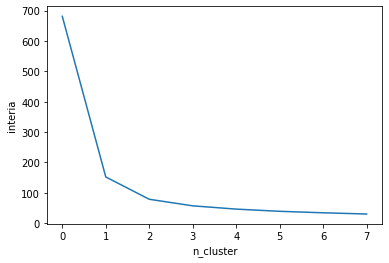

In [97]:
plt.plot(i)
plt.xlabel('n_cluster')
plt.ylabel('interia')
plt.show()

In [98]:
y=iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [99]:
from sklearn.metrics import classification_report ,confusion_matrix
cm=confusion_matrix(y,yc)
print(cm)

[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]


In [100]:
cr=classification_report(y,yc)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.96      0.86        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150

